In [2]:
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.regularizers import l2
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
import datetime as dt
import dill
# Check current directory
import os
print(os.getcwd())

/Users/sethblum/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Courses/1C51/project-repo/FinalProject_1.C01


In [35]:
modelpath = 'Model_Outputs/model_BiLSTM_3layers_2024-05-06 11:48:50.924766.keras'
model = load_model(modelpath)
predspath = 'Model_Outputs/predictions_BiLSTM_3layers_2024-05-07 07:53:52.513658.csv'
preddf = pd.read_csv(predspath)

data = pd.read_pickle('X_test.pkl')
Xscaler = pd.read_pickle('Xscaler.pkl')

In [36]:
data = pd.DataFrame(Xscaler.inverse_transform(data[:,0:4]))
DAM = data[0]
preddf['DAM'] = DAM

In [37]:
preddf.drop(columns=['Unnamed: 0'], inplace=True)
preddf

,Actual,Predicted,DAM
0,47.97,50.687680,33.17
1,45.04,52.470524,28.29
2,41.90,46.717426,28.29
3,37.24,47.057660,28.29
4,3.95,47.797604,28.29
...,...,...,...
55815,12.08,15.712752,18.45
55816,12.40,16.465582,18.45
55817,12.77,16.689707,18.45
55818,12.80,16.912886,18.45


In [38]:
# scalerX = dill.load(open('Xscaler.pkl', 'rb'))
# scalerY = dill.load(open('Yscaler.pkl', 'rb'))
# # Load the data
# X_train_encoded = dill.load(open('X_train_encoded.pkl', 'rb'))
# X_test_encoded = dill.load(open('X_test_encoded.pkl', 'rb'))
# y_train_encoded = dill.load(open('y_train_encoded.pkl', 'rb'))
# y_test_encoded = dill.load(open('y_test_encoded.pkl', 'rb'))
# # TODO need to add
# y_test_notscaled = dill.load(open('raw_y_test.pkl', 'rb'))

In [39]:
# Define function to compare and plot model predictions from actual values
# Allow to zoom into a certain interval on the x axis

def plot_comparison(predictions, actual, DAM = None, startx=None, endx=None, starty=None, endy=None):
    """
    Plot the predicted vs actual values with an optional x-axis limit.

    Parameters:
        predictions (array-like): The predicted values.
        actual (array-like): The actual values.
        start (int, optional): Start index for x-axis limit.
        end (int, optional): End index for x-axis limit.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(predictions, label='Predicted')  # Added markers for better visibility
    plt.plot(actual, label='Actual')  # Added markers for better visibility
    if DAM is not None:
        plt.plot(DAM, label='DAM')
    plt.legend()
    
    # Set x-axis limits if specified
    if startx is not None or endx is not None:
        plt.xlim(startx, endx)
        plt.ylim(preddf['Actual'][startx:endx].min(), preddf['Actual'][startx:endx].max())
        
    # Set y-axis limits if specified
    if starty is not None or endy is not None:
        plt.ylim(starty, endy)    
    
    plt.title('Comparison of Predictions and Actual Values')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()

    
    # Plot the differences between the actual value and the predicted value
    plt.figure(figsize=(12, 6))
    
    # Set x-axis limits if specified
    if startx is not None or endx is not None:
        plt.xlim(startx, endx)
        
    # Set y-axis limits if specified
    if starty is not None or endy is not None:
        plt.ylim(starty, endy)    
    
    plt.plot(predictions - actual, label='Difference')
    plt.legend()
    print('everything but show')
    plt.show()
    print('done')
    return
    

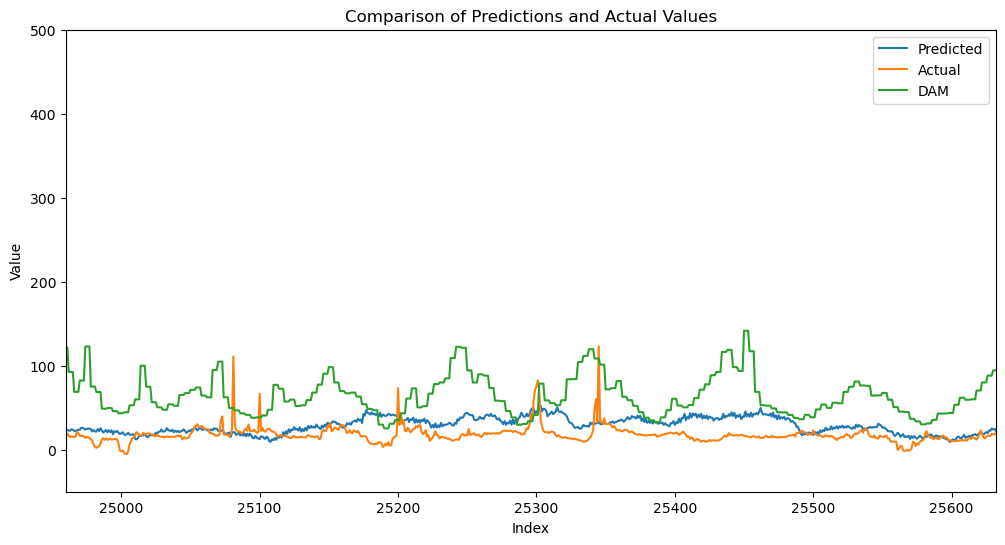

everything but show


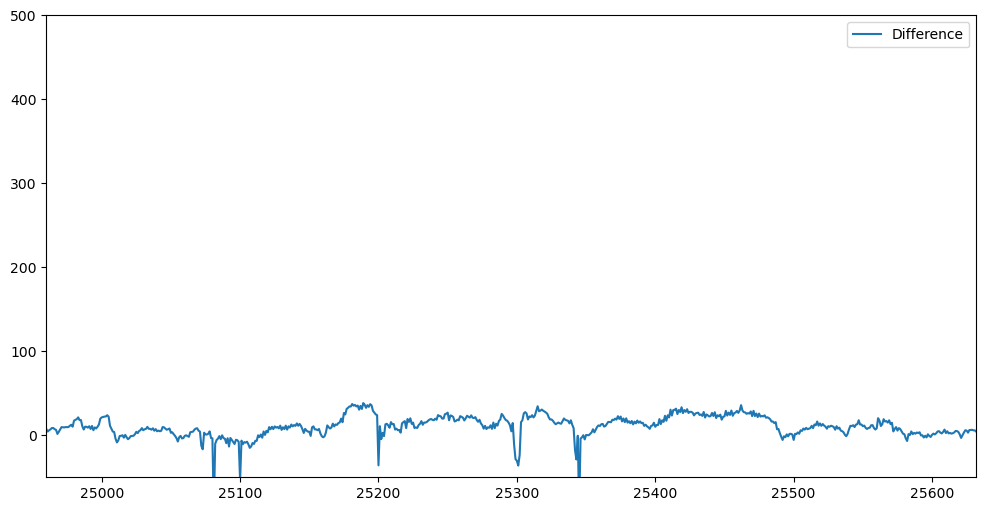

done


In [40]:
plot_comparison(preddf['Predicted'], preddf['Actual'], preddf['DAM'], startx=96*260, endx=0+96*267, starty=-50, endy=500)

In [41]:
signdiff = np.sign(preddf['Predicted']-preddf['DAM']) == np.sign(preddf['Actual']-preddf['DAM'])

signdays = []
for i in range(1,len(signdiff)):
    if i % (96) == 0:
        signdays.append(signdiff[:i].sum()/len(signdiff[:i]))

In [42]:
print(signdiff.sum()/len(signdiff))

0.7568613400214976


/Users/sethblum/anaconda3/envs/joint1c51/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sethblum/anaconda3/envs/joint1c51/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


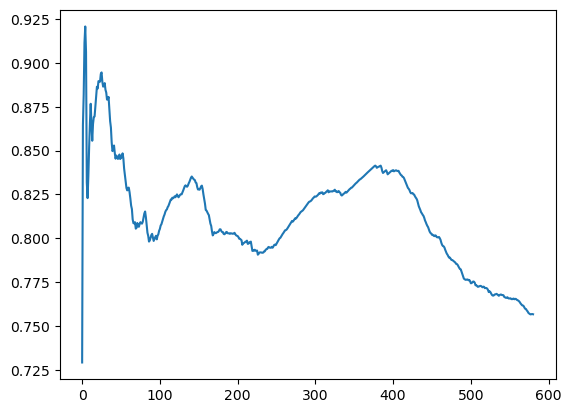

/Users/sethblum/anaconda3/envs/joint1c51/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

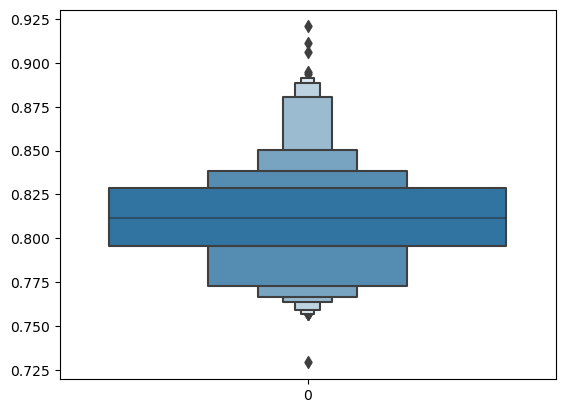

In [43]:
import seaborn as sns
sns.lineplot(x=range(len(signdays)), y=signdays)
plt.show()
sns.boxenplot(signdays)

In [44]:
(np.sign(preddf['Predicted']-preddf['DAM'])).sum()/len(preddf)

0.0932282336080258